### MACHINE LEARNING 3: Assignment

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.
* rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs

In [24]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
## Read the Dataset
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [20]:
#dta['affair'] = np.where(dta['affairs']==0, 0, 1)
dta['affair'] = (dta.affairs > 0).astype(int)

In [21]:
dta.drop(labels = 'affairs', axis=1, inplace = True)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [32]:
dta.shape

(6366, 9)

##### Dataset Decriptions

In [33]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


##### Information of Dataset

In [35]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int32
dtypes: float64(8), int32(1)
memory usage: 422.8 KB


#####  Density of Null values across columns

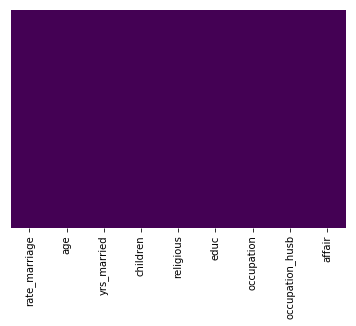

In [26]:
## Finding NULL values
sns.heatmap(dta.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Observation: No column has null values

##### Plot the distribution of Age

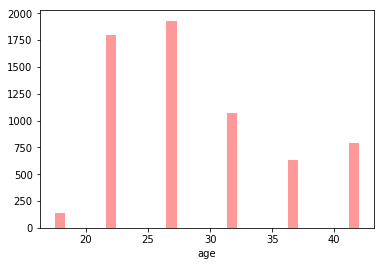

In [30]:
## Distributed Histogram Distribution
sns.distplot(dta['age'].dropna(),kde=False,color='red',bins=30)

##### Count of children

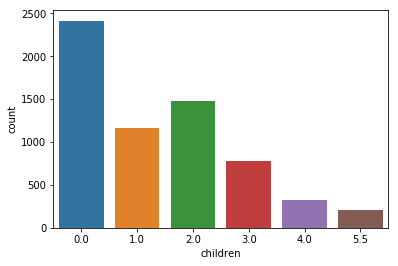

In [25]:
## Count of a column
sns.countplot(x='children',data=dta)

* 2400 women has no kids
* 1000 women has only 1 kid
* 1500 women has 2 kids
* 35% of women have no child

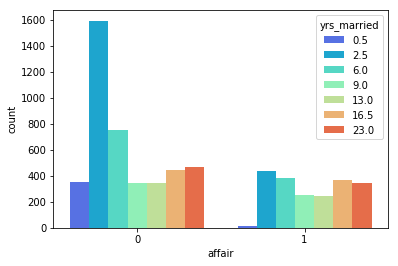

In [29]:
## Count of Columns(used to find imbalance dataset)
sns.countplot(x='affair',hue='yrs_married',data=dta,palette='rainbow')

* 80% of women who are married for 2.5 years don't have affair
* Most of the women who are married for 0.5 years have no affair
* About 50% of women who are married for more than 9 years or more have affair
* About 30% of women who are married for 6 years have affair

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


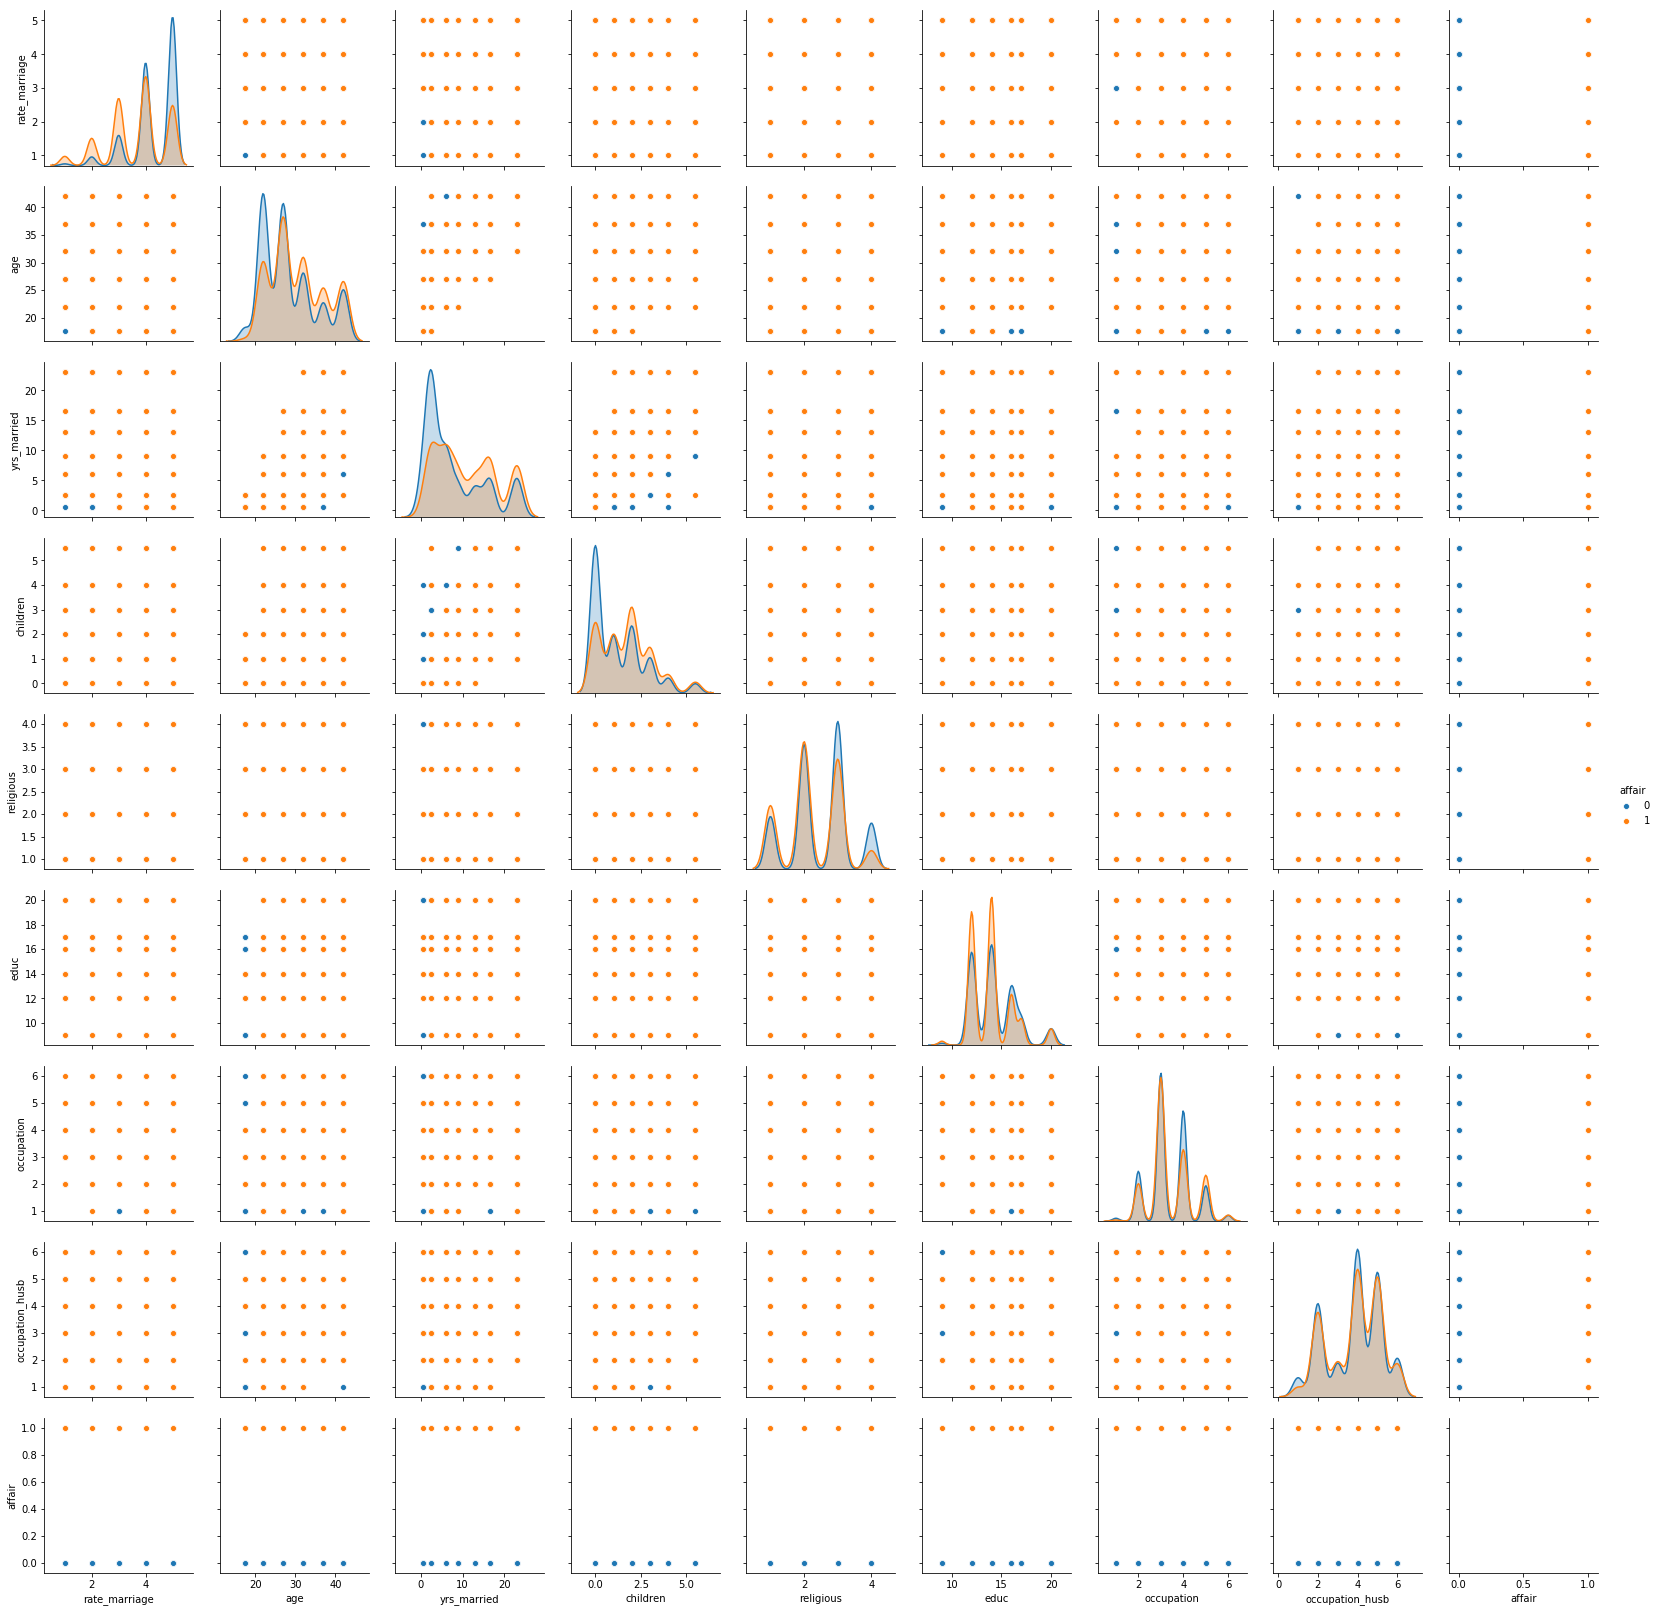

In [50]:
sns.pairplot(dta, hue ='affair')

* from the pair plot, it is evident that Logistic Regression will provide good accuracy because data is not mixed up and can be classified with best fit line

#### Train the model

In [41]:
X= dta.iloc[:,:-1]
y = dta.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [53]:
lg = LogisticRegression(n_jobs=-1)
lg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

#### Model Evaluation

In [55]:
pred = lg.predict(X_test)
confusion=confusion_matrix(y_test,pred)
acuracy_sc=accuracy_score(y_test,pred)
confusion

array([[979, 110],
       [324, 179]], dtype=int64)

In [57]:
print("The accuracy Model of Logistic  Regression is : {}".format(acuracy_sc))

The accuracy Model of Logistic  Regression is : 0.7273869346733668


#### Applying other Classification Algorithms to prove if Logistic is giving best accuracy

##### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy',max_depth=4)
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)
confusion=confusion_matrix(y_test,pred)
acuracy_sc=accuracy_score(y_test,pred)
acuracy_sc

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.7066582914572864

#### Random Forest

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy',n_jobs=-1)
score = cross_val_score(classifier,X,y,cv=10)
score.mean()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.688339642357209

#### XGBoost

In [61]:
import xgboost
reg = xgboost.XGBClassifier()
score = cross_val_score(reg,X,y,cv=20)
score.mean()

0.726857885940884

##### K Nearest Neighbor

In [64]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
scalar_features = scalar.transform(X)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,70):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

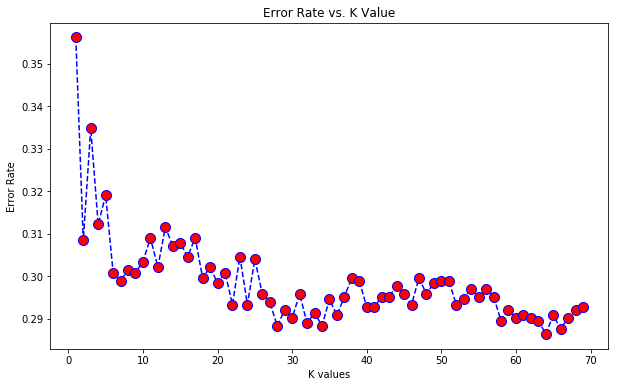

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')

In [69]:
knnmodel = KNeighborsClassifier(n_neighbors=29)
knnmodel.fit(X_train,y_train)
pred=knnmodel.predict(X_test)
confusion=confusion_matrix(y_test,pred)
acuracy_sc=accuracy_score(y_test,pred)
acuracy_sc

0.7079145728643216

### It is Proven that Logistic Regression has given best accuracy which was concluded from Pair Plot